shape: (10, 4)
┌────────────────────────┬─────────┬───────┬───────┐
│ func-head              ┆ runtime ┆ Start ┆ End   │
│ ---                    ┆ ---     ┆ ---   ┆ ---   │
│ str                    ┆ f64     ┆ f64   ┆ f64   │
╞════════════════════════╪═════════╪═══════╪═══════╡
│ think(() kw={})        ┆ 10.01   ┆ 0.0   ┆ 10.01 │
│ turbo_thrash(() kw={}) ┆ 3.82    ┆ 10.01 ┆ 13.83 │
│ think(() kw={})        ┆ 10.0    ┆ 13.83 ┆ 23.83 │
│ turbo_thrash(() kw={}) ┆ 3.41    ┆ 23.83 ┆ 27.24 │
│ ...                    ┆ ...     ┆ ...   ┆ ...   │
│ think(() kw={})        ┆ 10.01   ┆ 40.81 ┆ 50.82 │
│ turbo_thrash(() kw={}) ┆ 3.25    ┆ 50.82 ┆ 54.07 │
│ think(() kw={})        ┆ 10.01   ┆ 54.07 ┆ 64.08 │
│ turbo_thrash(() kw={}) ┆ 3.3     ┆ 64.08 ┆ 67.38 │
└────────────────────────┴─────────┴───────┴───────┘


C:\Users\pmayn\AppData\Local\Temp\ipykernel_10104\1378673092.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


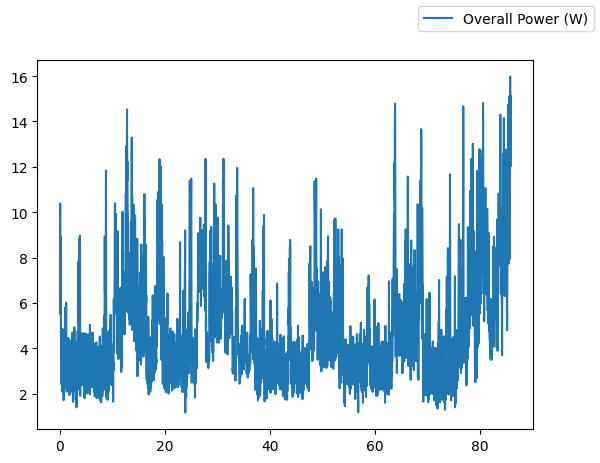

In [26]:
import polars as pl
import matplotlib.pyplot as plt
import csv

# getting the power usage statistics

powerdata = "data\power-logs\PowerLog-2023-04-07 14-03-06.295516"

df = pl.read_csv(powerdata)

df = df.with_columns([
    pl.col("System Time").str.strptime(pl.Time, fmt="%H:%M:%S:%f",strict=False).cast(pl.Time, strict=False),    
])

timedata = "data\\intervals\\temp.csv"
timing = pl.read_csv(timedata)
#timing.select(pl.cumsum('runtime'))
timing = timing.with_columns([
    pl.cumsum('runtime').alias("Start") - pl.col('runtime'),
    pl.cumsum('runtime').alias("End"), 
])

print(timing)


fig, ax = plt.subplots()

timeline = df.select(pl.col("Elapsed Time (sec)"))
#ax.plot(timeline, df.select(pl.col("Cumulative Processor Energy_0(Joules)")), label="Cumulative Energy (J)")
ax.plot(timeline, df.select(pl.col("Processor Power_0(Watt)")), label= "Overall Power (W)")
fig.legend()
fig.show()
